In [20]:
import networkx as nx
import graficas as g
import entropia as en
import matplotlib.pyplot as plt
import time
import importlib
import numpy as np

In [21]:
n=1000
m=15
num_simulaciones=50

In [22]:
importlib.reload(en)
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [23]:
entropia_BA_fallos= []
entropia_WS_fallos=[]

inicio=time.time()
for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    N = len(G_BA)
    entropia_BA=[]
    entropia_WS=[]
    G_1=G_BA.copy()
    G_2=G_WS.copy()
    for j in range(N):
        entropia_BA.append(en.entropia_tsallis_1(G_1,2))
        entropia_WS.append(en.entropia_tsallis_1(G_2,2))
        G_1,_=g.ataques(G_1,'random')
        G_2,_=g.ataques(G_2,'random')
    entropia_BA_fallos.append(entropia_BA)
    entropia_WS_fallos.append(entropia_WS)
final=time.time()

print(f"El tiempo total de ejecución fue de {final-inicio}")

Estamos en la 0 simulación
Estamos en la 1 simulación
Estamos en la 2 simulación
Estamos en la 3 simulación
Estamos en la 4 simulación
Estamos en la 5 simulación
Estamos en la 6 simulación
Estamos en la 7 simulación
Estamos en la 8 simulación
Estamos en la 9 simulación
Estamos en la 10 simulación
Estamos en la 11 simulación
Estamos en la 12 simulación
Estamos en la 13 simulación
Estamos en la 14 simulación
Estamos en la 15 simulación
Estamos en la 16 simulación
Estamos en la 17 simulación
Estamos en la 18 simulación
Estamos en la 19 simulación
Estamos en la 20 simulación
Estamos en la 21 simulación
Estamos en la 22 simulación
Estamos en la 23 simulación
Estamos en la 24 simulación
Estamos en la 25 simulación
Estamos en la 26 simulación
Estamos en la 27 simulación
Estamos en la 28 simulación
Estamos en la 29 simulación
Estamos en la 30 simulación
Estamos en la 31 simulación
Estamos en la 32 simulación
Estamos en la 33 simulación
Estamos en la 34 simulación
Estamos en la 35 simulación
Es

In [24]:

G_1=G_BA.copy()
G_2=G_WS.copy()

entropia_BA_ataques=[]
entropia_WS_ataques=[]

inicio=time.time()
for i in range(num_simulaciones):
    print(f"Estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    N = len(G_BA)
    entropia_BA=[]
    entropia_WS=[]
    G_1=G_BA.copy()
    G_2=G_WS.copy()
    for j in range(N):
        entropia_BA.append(en.entropia_tsallis_1(G_1,2))
        entropia_WS.append(en.entropia_tsallis_1(G_2,2))
        G_1,_=g.ataques(G_1,'degree')
        G_2,_=g.ataques(G_2,'degree')
    entropia_BA_ataques.append(entropia_BA)
    entropia_WS_ataques.append(entropia_WS)
final=time.time()

print(f"El tiempo total de ejecución fue de {final-inicio}")

Estamos en la 0 simulación
Estamos en la 1 simulación
Estamos en la 2 simulación
Estamos en la 3 simulación
Estamos en la 4 simulación
Estamos en la 5 simulación
Estamos en la 6 simulación
Estamos en la 7 simulación
Estamos en la 8 simulación
Estamos en la 9 simulación
Estamos en la 10 simulación
Estamos en la 11 simulación
Estamos en la 12 simulación
Estamos en la 13 simulación
Estamos en la 14 simulación
Estamos en la 15 simulación
Estamos en la 16 simulación
Estamos en la 17 simulación
Estamos en la 18 simulación
Estamos en la 19 simulación
Estamos en la 20 simulación
Estamos en la 21 simulación
Estamos en la 22 simulación
Estamos en la 23 simulación
Estamos en la 24 simulación
Estamos en la 25 simulación
Estamos en la 26 simulación
Estamos en la 27 simulación
Estamos en la 28 simulación
Estamos en la 29 simulación
Estamos en la 30 simulación
Estamos en la 31 simulación
Estamos en la 32 simulación
Estamos en la 33 simulación
Estamos en la 34 simulación
Estamos en la 35 simulación
Es

In [25]:
resultados_tsallis_1_BA_fallos = [sum(col)/num_simulaciones for col in zip(*entropia_BA_fallos)]
resultados_tsallis_1_WS_fallos = [sum(col)/num_simulaciones for col in zip(*entropia_WS_fallos)]

resultados_tsallis_1_BA_ataques = [sum(col)/num_simulaciones for col in zip(*entropia_BA_ataques)]
resultados_tsallis_1_WS_ataques = [sum(col)/num_simulaciones for col in zip(*entropia_WS_ataques)]

In [26]:

entropia_BA_fallos=[]
entropia_WS_fallos=[]

inicio=time.time()
for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    N = len(G_BA)
    entropia_BA=[]
    entropia_WS=[]
    G_1=G_BA.copy()
    G_2=G_WS.copy()
    for j in range(N):
        entropia_BA.append(en.entropia_tsallis_2(G_1,2))
        entropia_WS.append(en.entropia_tsallis_2(G_2,2))
        G_1,_=g.ataques(G_1,'random')
        G_2,_=g.ataques(G_2,'random')
    entropia_BA_fallos.append(entropia_BA)
    entropia_WS_fallos.append(entropia_WS)
final=time.time()
print(f"El tiempo total de ejecución fue de {final-inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
estamos en la 5 simulación
estamos en la 6 simulación
estamos en la 7 simulación
estamos en la 8 simulación
estamos en la 9 simulación
estamos en la 10 simulación
estamos en la 11 simulación
estamos en la 12 simulación
estamos en la 13 simulación
estamos en la 14 simulación
estamos en la 15 simulación
estamos en la 16 simulación
estamos en la 17 simulación
estamos en la 18 simulación
estamos en la 19 simulación
estamos en la 20 simulación
estamos en la 21 simulación
estamos en la 22 simulación
estamos en la 23 simulación
estamos en la 24 simulación
estamos en la 25 simulación
estamos en la 26 simulación
estamos en la 27 simulación
estamos en la 28 simulación
estamos en la 29 simulación
estamos en la 30 simulación
estamos en la 31 simulación
estamos en la 32 simulación
estamos en la 33 simulación
estamos en la 34 simulación
estamos en la 35 simulación
es

In [27]:


entropia_BA_ataques=[]
entropia_WS_ataques=[]

inicio=time.time()
for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)
    N = len(G_BA)
    entropia_BA=[]
    entropia_WS=[]
    G_1=G_BA.copy()
    G_2=G_WS.copy()
    for j in range(N):
        entropia_BA.append(en.entropia_tsallis_2(G_1,2))
        entropia_WS.append(en.entropia_tsallis_2(G_2,2))
        G_1,_=g.ataques(G_1,'degree')
        G_2,_=g.ataques(G_2,'degree')
    entropia_BA_ataques.append(entropia_BA)
    entropia_WS_ataques.append(entropia_WS)
final=time.time()
print(f"El tiempo total de ejecución fue de {final-inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
estamos en la 5 simulación
estamos en la 6 simulación
estamos en la 7 simulación
estamos en la 8 simulación
estamos en la 9 simulación
estamos en la 10 simulación
estamos en la 11 simulación
estamos en la 12 simulación
estamos en la 13 simulación
estamos en la 14 simulación
estamos en la 15 simulación
estamos en la 16 simulación
estamos en la 17 simulación
estamos en la 18 simulación
estamos en la 19 simulación
estamos en la 20 simulación
estamos en la 21 simulación
estamos en la 22 simulación
estamos en la 23 simulación
estamos en la 24 simulación
estamos en la 25 simulación
estamos en la 26 simulación
estamos en la 27 simulación
estamos en la 28 simulación
estamos en la 29 simulación
estamos en la 30 simulación
estamos en la 31 simulación
estamos en la 32 simulación
estamos en la 33 simulación
estamos en la 34 simulación
estamos en la 35 simulación
es

In [28]:
resultados_tsallis_2_BA_fallos = [sum(col)/num_simulaciones for col in zip(*entropia_BA_fallos)]
resultados_tsallis_2_WS_fallos = [sum(col)/num_simulaciones for col in zip(*entropia_WS_fallos)]

resultados_tsallis_2_BA_ataques = [sum(col)/num_simulaciones for col in zip(*entropia_BA_ataques)]
resultados_tsallis_2_WS_ataques = [sum(col)/num_simulaciones for col in zip(*entropia_WS_ataques)]

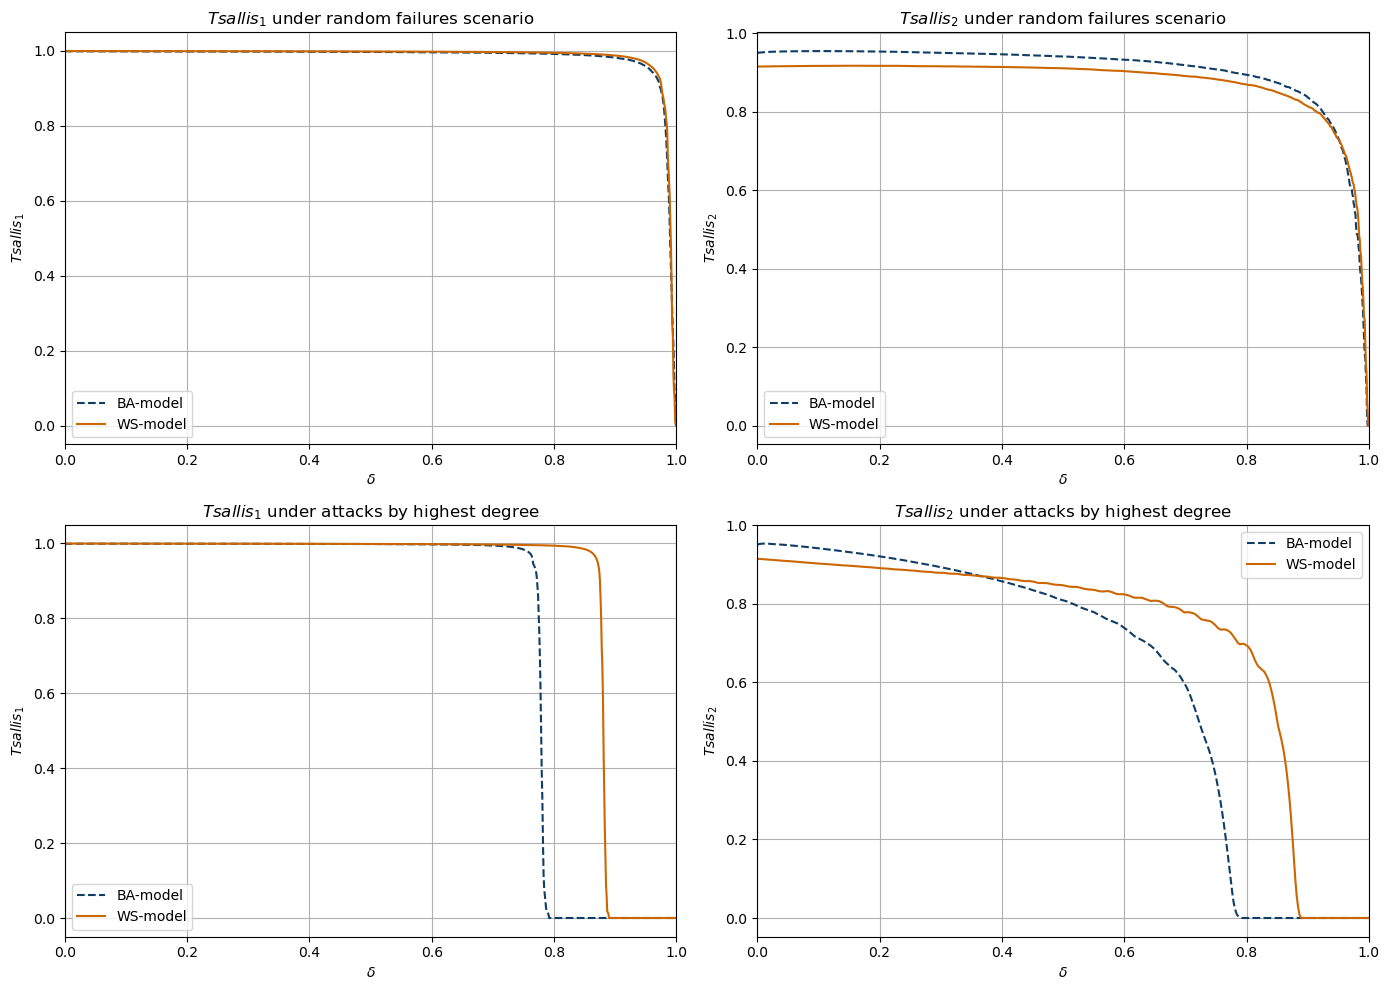

In [29]:
# Colores
blue_dark = "#0e3d66"
orange_dark = "#cc6600"

# Eje X
delta = np.linspace(0, 1, len(resultados_tsallis_1_BA_fallos))

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Datos y títulos organizados por filas (fallos y luego ataques)
graficas = [
    (resultados_tsallis_1_BA_fallos, resultados_tsallis_1_WS_fallos, r"$Tsallis_1$ under random failures scenario"),
    (resultados_tsallis_2_BA_fallos, resultados_tsallis_2_WS_fallos, r"$Tsallis_2$ under random failures scenario"),
    (resultados_tsallis_1_BA_ataques, resultados_tsallis_1_WS_ataques, r"$Tsallis_1$ under attacks by highest degree"),
    (resultados_tsallis_2_BA_ataques, resultados_tsallis_2_WS_ataques, r"$Tsallis_2$ under attacks by highest degree"),
]

# Graficar
for i, (ba, ws, titulo) in enumerate(graficas):
    ax = axs[i]
    ax.plot(delta, ba, label="BA-model", color=blue_dark,linestyle='--')
    ax.plot(delta, ws, label="WS-model", color=orange_dark)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel(r"$\delta$")
    ax.set_ylabel(fr"$Tsallis_{{{1 if '1' in titulo else 2}}}$")
    ax.set_xlim(0, 1)
    ax.grid(True)
    ax.legend()

plt.savefig('Tsallis_entropy.png',dpi=300)
plt.tight_layout()
plt.show()

In [31]:
num_simulaciones=5

In [32]:
N = 1000

inicio = time.time()

tsallis_1_BA_fallos = []
tsallis_1_WS_fallos = []

f_1 = lambda G: en.entropia_tsallis_1(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'random',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'random',j))
    tsallis_1_BA_fallos.append(IR_BA)
    tsallis_1_WS_fallos.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 2513.52255487442


In [33]:
N = 1000

inicio = time.time()

tsallis_1_BA_ataques = []
tsallis_1_WS_ataques = []

f_1 = lambda G: en.entropia_tsallis_1(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'degree',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'degree',j))
    tsallis_1_BA_ataques.append(IR_BA)
    tsallis_1_WS_ataques.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 22509.178296804428


In [34]:
resultados_tsallis_1_BA_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_1_BA_fallos)]
resultados_tsallis_1_WS_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_1_WS_fallos)]

resultados_tsallis_1_BA_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_1_BA_ataques)]
resultados_tsallis_1_WS_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_1_WS_ataques)]

In [35]:

inicio = time.time()

tsallis_2_BA_fallos = []
tsallis_2_WS_fallos = []

f_1 = lambda G: en.entropia_tsallis_2(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'random',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'random',j))
    tsallis_2_BA_fallos.append(IR_BA)
    tsallis_2_WS_fallos.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 1855.3176052570343


In [36]:
N = len(G_BA)

inicio = time.time()

tsallis_2_BA_ataques = []
tsallis_2_WS_ataques = []

f_1 = lambda G: en.entropia_tsallis_2(G,2)

for i in range(num_simulaciones):
    print(f"estamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    IR_BA = []
    IR_WS = []
    for j in range(1,N,1):
        G_1 = G_BA.copy()
        G_2 = G_WS.copy()
        IR_BA.append(g.indice_robustez(G_1,f_1,2,'degree',j))
        IR_WS.append(g.indice_robustez(G_2,f_1,2,'degree',j))
    tsallis_2_BA_ataques.append(IR_BA)
    tsallis_2_WS_ataques.append(IR_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

estamos en la 0 simulación
estamos en la 1 simulación
estamos en la 2 simulación
estamos en la 3 simulación
estamos en la 4 simulación
El tiempo de ejecución fue de: 4201.0513343811035


In [37]:
resultados_tsallis_2_BA_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_2_BA_fallos)]
resultados_tsallis_2_WS_fallos = [sum(col)/num_simulaciones for col in zip(*tsallis_2_WS_fallos)]

resultados_tsallis_2_BA_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_2_BA_ataques)]
resultados_tsallis_2_WS_ataques = [sum(col)/num_simulaciones for col in zip(*tsallis_2_WS_ataques)]

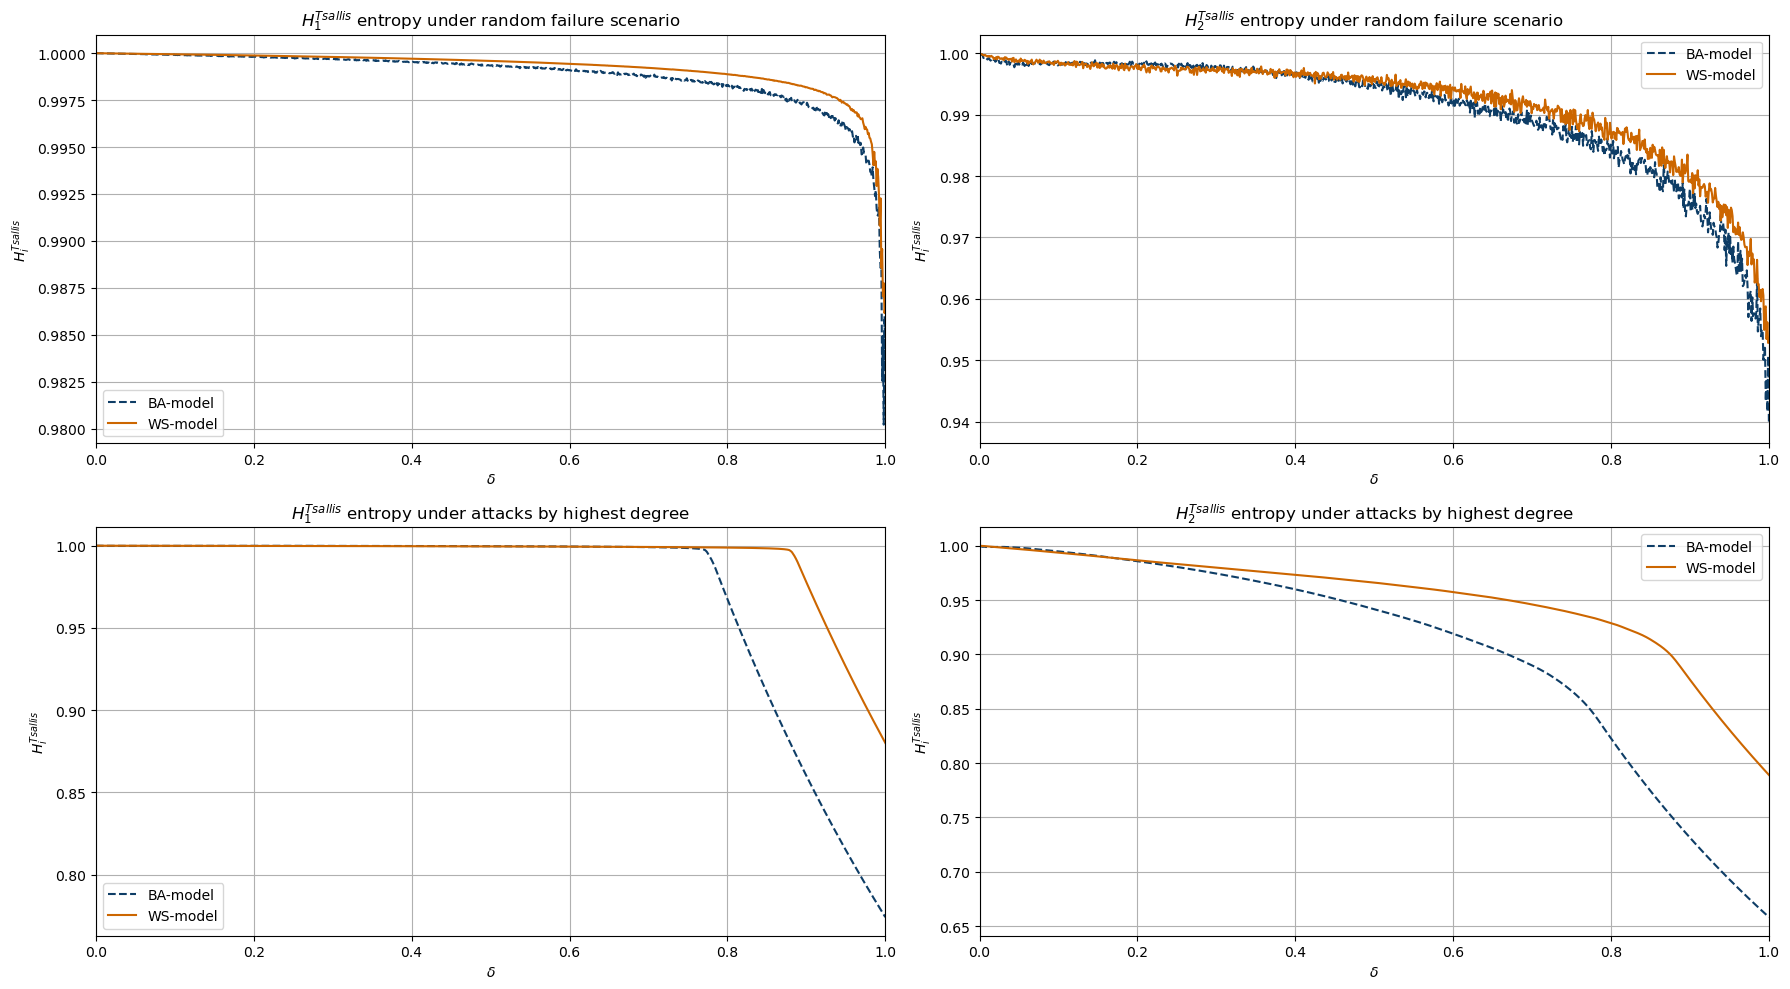

In [40]:
blue_dark = "#0e3d66"    # Para BA
orange_dark = "#cc6600"  # Para WS

# Asumiendo que todas las listas tienen la misma longitud
delta = np.linspace(0, 1, len(resultados_tsallis_1_BA_fallos))

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Lista de datos: (BA, WS, título)
graficas = [
    (resultados_tsallis_1_BA_fallos, resultados_tsallis_1_WS_fallos, 
     r"$H_1^{Tsallis}$ entropy under random failure scenario"),
    
    (resultados_tsallis_2_BA_fallos, resultados_tsallis_2_WS_fallos, 
     r"$H_2^{Tsallis}$ entropy under random failure scenario"),
    
    (resultados_tsallis_1_BA_ataques, resultados_tsallis_1_WS_ataques, 
     r"$H_1^{Tsallis}$ entropy under attacks by highest degree"),
    
    (resultados_tsallis_2_BA_ataques, resultados_tsallis_2_WS_ataques, 
     r"$H_2^{Tsallis}$ entropy under attacks by highest degree"),
]

# Graficar cada subplot
for i, (ba, ws, titulo) in enumerate(graficas):
    ax = axs[i]
    ax.plot(delta, ba, label="BA-model", color=blue_dark, linestyle='--')
    ax.plot(delta, ws, label="WS-model", color=orange_dark)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel(r"$\delta$")
    ax.set_ylabel(r"$H_i^{Tsallis}$")
    ax.set_xlim(0, 1)
    ax.legend()
    ax.grid(True)

# Ajustar diseño y guardar figura
plt.tight_layout()
plt.savefig("tsallis_entropy_IR.png", dpi=300)
plt.show()